<a href="https://colab.research.google.com/github/HARDIK218/NLP-Task/blob/main/Text_prediction_LSTM(ds).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.optimizers import RMSprop
import numpy as np
import random
import sys


In [5]:
#import text
filename = "/content/book(text prediction).txt"
raw_text = open(filename,'r',encoding = 'utf-8').read()
raw_text = raw_text.lower()
print(raw_text[0:1000])

﻿the project gutenberg ebook of the jungle book
    
this ebook is for the use of anyone anywhere in the united states and
most other parts of the world at no cost and with almost no restrictions
whatsoever. you may copy it, give it away or re-use it under the terms
of the project gutenberg license included with this ebook or online
at www.gutenberg.org. if you are not located in the united states,
you will have to check the laws of the country where you are located
before using this ebook.

title: the jungle book


author: rudyard kipling

release date: january 16, 2006 [ebook #236]
                most recently updated: may 1, 2023

language: english



*** start of the project gutenberg ebook the jungle book ***



the jungle book

by rudyard kipling



contents

     mowgli’s brothers
     hunting-song of the seeonee pack
     kaa’s hunting
     road-song of the bandar-log
     “tiger! tiger!”
      mowgli’s song
     the white seal
     lukannon
     “rikki-tikki-tavi”
      darze

In [6]:
#clean text
#remove number
raw_text = ''.join(c for c in raw_text if not c.isdigit())

char = sorted(list(set(raw_text)))#list of every character


In [7]:
char

['\n',
 ' ',
 '!',
 '#',
 '$',
 '%',
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '?',
 '[',
 ']',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'â',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '•',
 '™',
 '\ufeff']

In [8]:
#convert it to integers,each unique value will be assigned an integer
#create a dictionary of characters mapped to integer value
char_to_int = dict((c,i) for i,c in enumerate(char))

#do reverse so that we print character not in integer
int_to_char = dict((i,c) for i,c in enumerate(char))

In [9]:
#summarize the data
n_chars = len(raw_text)
n_vocab = len(char)
print("total char in the text",n_chars)
print("total vocab" , n_vocab)

total char in the text 292119
total vocab 55


In [10]:
#now we will craete input and output sequence for training

seq_length = 60
step = 10
sentences = [] #x values(sentences)
next_chars = [] #y value the character that follows the sentence defined as x
for i in range(0,n_chars-seq_length,step):
  sentences.append(raw_text[i:i+seq_length]) #step=1 means each sentence is offset just by single letter
  next_chars.append(raw_text[i+seq_length])
n_patterns = len(sentences)
print('number of sequences',n_patterns)

number of sequences 29206


In [11]:
# reshape input to be [samples, time steps, features]

#time steps = sequence length
#features = numbers of characters in our vocab (n_vocab)
#Vectorize all sentences: there are n_patterns sentences.
#For each sentence we have n_vocab characters available for seq_length
#Vectorization returns a vector for all sentences indicating the presence or absence
#of a character.

x = np.zeros((len(sentences),seq_length,n_vocab),dtype=np.bool)
y = np.zeros((len(sentences),n_vocab),dtype=np.bool)
for i,sentence in enumerate(sentences):
  for t,char in enumerate(sentence):
    x[i,t,char_to_int[char]] = 1
    y[i,char_to_int[next_chars[i]]] = 1

print(x.shape)
print(y.shape)
print(y[0:10])




<ipython-input-11-f086c95888d0>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((len(sentences),seq_length,n_vocab),dtype=np.bool)
<ipython-input-11-f086c95888d0>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences),n_vocab),dtype=np.bool)


(29206, 60, 55)
(29206, 55)
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False  True False
  False False False False False False False False False False False False
  False False False False False False False]
 [False  True False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False  True False False False False False False False False False False
  False False False False False False False False False False False 

In [12]:
#building the model
#we add return_sequences true as it gives 1st lstm out to the second lstm
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, n_vocab), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(n_vocab, activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           94208     
                                                                 
 dropout (Dropout)           (None, 60, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 55)                7095      
                                                                 
Total params: 232887 (909.71 KB)
Trainable params: 232887 (909.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# define the checkpoint
from keras.callbacks import ModelCheckpoint

filepath="saved_weights/saved_weights-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]


# Fit the model

history = model.fit(x, y,
          batch_size=128,
          epochs=50,
          callbacks=callbacks_list)

model.save('my_saved_weights_jungle_book_50epochs.h5')

Epoch 1/50
226/229 [============================>.] - ETA: 0s - loss: 2.0602
Epoch 1: loss improved from inf to 2.05919, saving model to saved_weights/saved_weights-01-2.0592.hdf5
229/229 [==============================] - 3s 11ms/step - loss: 2.0592
Epoch 2/50
 16/229 [=>............................] - ETA: 2s - loss: 2.0647

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


226/229 [============================>.] - ETA: 0s - loss: 2.0235
Epoch 2: loss improved from 2.05919 to 2.02278, saving model to saved_weights/saved_weights-02-2.0228.hdf5
229/229 [==============================] - 2s 11ms/step - loss: 2.0228
Epoch 3/50
227/229 [============================>.] - ETA: 0s - loss: 1.9893
Epoch 3: loss improved from 2.02278 to 1.98928, saving model to saved_weights/saved_weights-03-1.9893.hdf5
229/229 [==============================] - 3s 12ms/step - loss: 1.9893
Epoch 4/50
227/229 [============================>.] - ETA: 0s - loss: 1.9555
Epoch 4: loss improved from 1.98928 to 1.95450, saving model to saved_weights/saved_weights-04-1.9545.hdf5
229/229 [==============================] - 3s 13ms/step - loss: 1.9545
Epoch 5/50
226/229 [============================>.] - ETA: 0s - loss: 1.9229
Epoch 5: loss improved from 1.95450 to 1.92328, saving model to saved_weights/saved_weights-05-1.9233.hdf5
229/229 [==============================] - 3s 11ms/step - loss

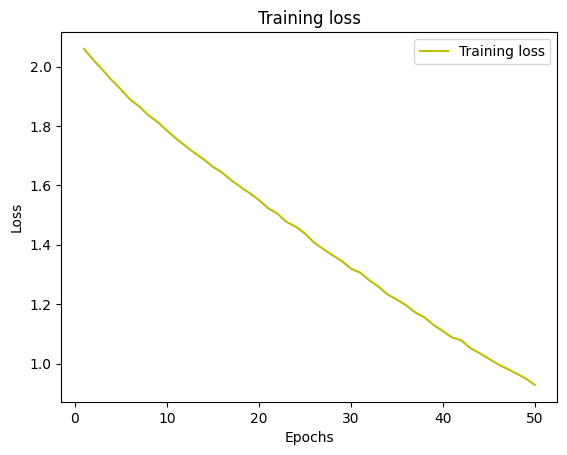

In [15]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
#We must provide a sequence of seq_lenth as input to start the generation process

#The prediction results is probabilities for each of the 48 characters at a specific
#point in sequence. Let us pick the one with max probability and print it out.
#Writing our own softmax function....

def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds) #exp of log (x), isn't this same as x??
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


In [17]:
#Prediction
# load the network weights
filename = "my_saved_weights_jungle_book_50epochs.h5"
model.load_weights(filename)

#Pick a random sentence from the text as seed.
start_index = random.randint(0, n_chars - seq_length - 1)

#Initiate generated text and keep adding new predictions and print them out
generated = ''
sentence = raw_text[start_index: start_index + seq_length]
generated += sentence

print('----- Seed for our text prediction: "' + sentence + '"')
#sys.stdout.write(generated)


for i in range(400):   # Number of characters including spaces
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()



----- Seed for our text prediction: "f the fight round the black panther--the
yells and chatterin"
g male pouth the ter lock. the head:
uf i his saitighoss and pack and growntion in troen, the feaths on the his look n; the fright prone to that eye god
we have as big sere the mach spere the conrasing of the till
grat norgions the see by the inderss in their never go fot the tood toution the tillled brownd himssithered the tong gamw the clops of the said begween steace till thee water#onf wer lit
